In [1]:
import networkx as nx

In [2]:
# Create a graph:
G = nx.Graph()

In [3]:
# Add nodes and edges:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

In [5]:
# Analyze the properties of the network
# Find out order (number of nodes):
G.order()

3

In [6]:
# or:
G.number_of_nodes()

3

In [7]:
# Find out size (number of edges):
G.size()

2

In [8]:
# or:
G.number_of_edges()

2

In [9]:
# The average degree of the graph tells the average number of nodes that can be reached from a node & it is 
# a measure of how connected graph is. 
# Retrieve the degree for each node in a graph by calling the degree method; obtaining the average degree is 
# a matter of summing up all the degree values and then dividing by the number of nodes in the graph.

sum(dict(G.degree()).values())/G.order()

1.3333333333333333

In [10]:
# Density of the graph; tells the percentage of the graph that can be reached by the average node:
nx.density(G)

0.6666666666666666

Diameter and average distance: only applicable when graph is completely connected, where all nodes can reach all other nodes. 

In [11]:
# Diameter of the graph tells what the longest path in the network is, or the maximum number of nodes 
# encountered getting between two nodes.

nx.diameter(G)

2

In [12]:
# Average distance is the average number of nodes encountered getting between two nodes.
nx.average_shortest_path_length(G)

1.3333333333333333

# Node Centrality Metrics

In [17]:
# Betweenness centrality tells us which nodes in our network are likely pathways for information. 
betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness

{1: 1.0, 2: 0.0, 3: 0.0}

In [18]:
# Closeness centrality measures node reach or how fast information would spread from that node to other nodes. 
closeness = nx.closeness_centrality(G, distance='edge')
closeness

{1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

In [19]:
# Degree centrality is a measure of popularity based on a node's degree. 
degree = nx.degree_centrality(G)
degree

{1: 1.0, 2: 0.5, 3: 0.5}

In [20]:
# Eigenvector centrality measures related influence or who is closest to the most important nodes in the network. 
eigenvector = nx.eigenvector_centrality_numpy(G)
eigenvector

{1: 0.7071067811865476, 2: 0.4999999999999999, 3: 0.4999999999999999}

In [21]:
# PageRank centrality is a variant of Eigenvector centrality that uses edges from other important nodes as a 
# measure of a node's importance.
pagerank = nx.pagerank(G)
pagerank

{1: 0.48648582432442095, 2: 0.25675708783778944, 3: 0.25675708783778944}

# Building and Analyzing Graphs from Tabular Data

In [22]:
# Rows Represent Transactions or Interactions:
G = nx.from_pandas_edgelist(df, source, target)

NameError: name 'df' is not defined

In [43]:
# Rows Represent Entities:
def df_to_graph(df, entity, edge) :
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    return graph_df


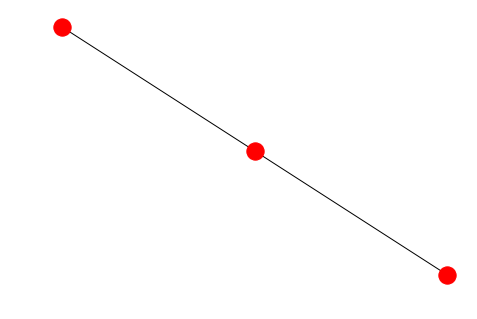

In [27]:
# Visualization of Network Data:
nx.draw(G)


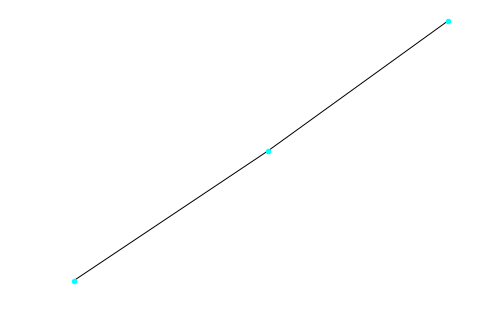

In [30]:
figsize=(10,5)
nx.draw(G, node_size=20, node_color='cyan')

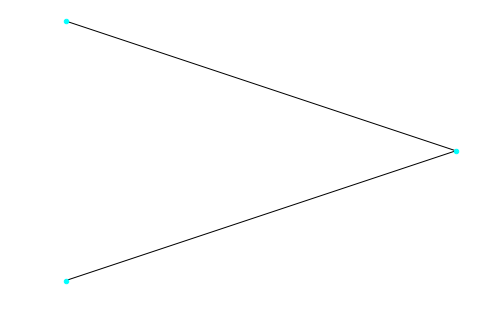

In [31]:
# Circular layout:
nx.draw_circular(G, node_size=20, node_color='cyan')


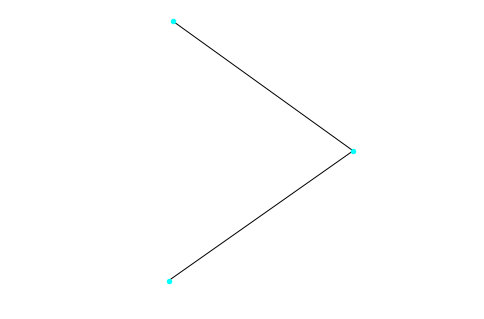

In [32]:
# Kamada-Kawai force-directed layout:

nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

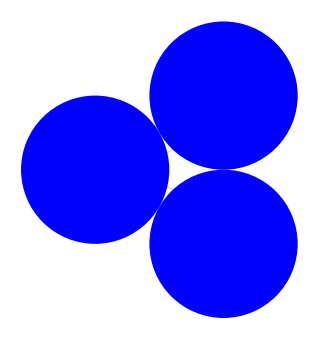

In [33]:
# * Circos Plots:
from nxviz import CircosPlot
c = CircosPlot(G)
c.draw()

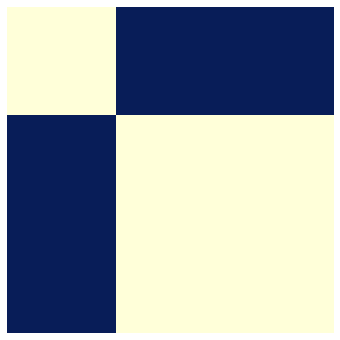

In [34]:
# * Matrix Plots:
from nxviz import MatrixPlot
m = MatrixPlot(G)
m.draw()

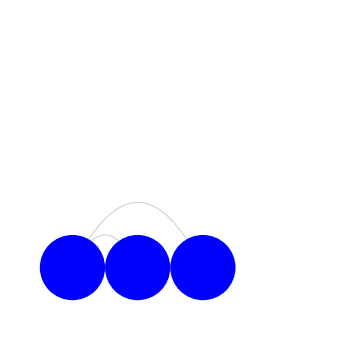

In [35]:
#* Arc Plots:
from nxviz import ArcPlot
a = ArcPlot(G)
a.draw()

# Deeper Analysis of Networks

In [39]:
# Subgraphs:

#ego = nx.ego_graph(G, 'NodeName', radius=1)
ego = nx.ego_graph(G, 1, radius=1)
ego

In [40]:
# Community Detection:
import community
parts = community.best_partition(G)


/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


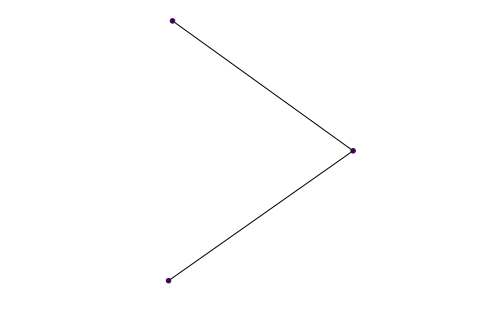

In [42]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=20, node_color=values)